In [1]:
!jt -t gruvboxd -f hack -tf liberation -cursc p -fs 9 -ofs 85 -tfs 95 -dfs 9 -nfs 9 -cellw 100% -cursw 6

In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', fscale=1.2, gridlines='-.', ticks=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, plot_roc_curve, classification_report

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


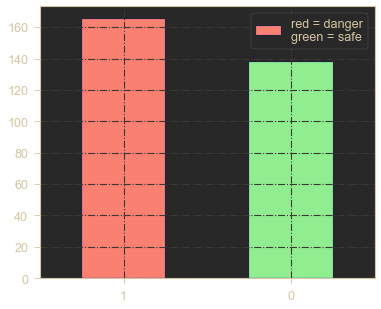

In [3]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightgreen"], edgecolor="blue", figsize=(6,5), zorder=0) 
pt.legend(["red = danger\ngreen = safe"])
pt.xticks(rotation=0);

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


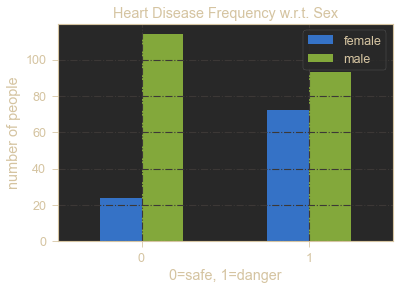

In [5]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar")
pt.legend(["female", "male"])
pt.xticks(rotation=0)
pt.title("Heart Disease Frequency w.r.t. Sex")
pt.xlabel("0=safe, 1=danger")
pt.ylabel("number of people");

In [6]:
print("<Based on our dataset:>")
print("-----------------------")
print(f"A female patient has a {72/96*100}% chance of having a heart disease.")
print(f"A male patient has a {93/207*100:.3f}% chnace of having a heart disease.")

<Based on our dataset:>
-----------------------
A female patient has a 75.0% chance of having a heart disease.
A male patient has a 44.928% chnace of having a heart disease.


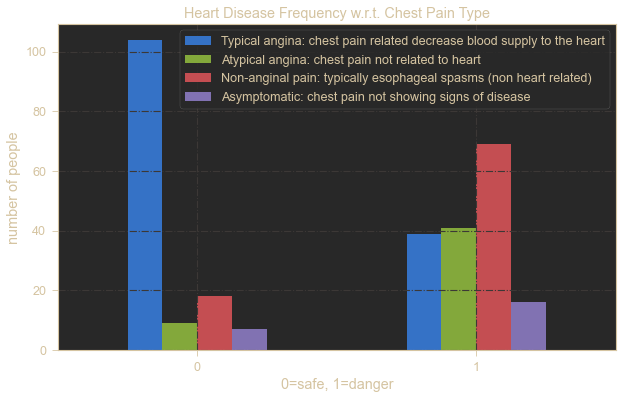

In [7]:
pd.crosstab(df["target"], df["cp"]).plot(kind="bar", figsize=(10,6))
pt.xticks(rotation=0)
pt.title("Heart Disease Frequency w.r.t. Chest Pain Type")
pt.xlabel("0=safe, 1=danger")
pt.legend(["Typical angina: chest pain related decrease blood supply to the heart",
           "Atypical angina: chest pain not related to heart",
           "Non-anginal pain: typically esophageal spasms (non heart related)",
           "Asymptomatic: chest pain not showing signs of disease"])
pt.ylabel("number of people");

In [8]:
print("<Based on our dataset:>")
print("-----------------------")
print(f"Typical angina has a {39/143*100:.4f}% chance of having a heart disease.")
print(f"Atypical angina has a {41/50*100:.3f}% chnace of having a heart disease.")
print(f"Non anginal pain has a {69/87*100:.2f}% chance of having a heart disease.")
print(f"Asymptomatic has a {16/23*100:.6f}% chnace of having a heart disease.")

<Based on our dataset:>
-----------------------
Typical angina has a 27.2727% chance of having a heart disease.
Atypical angina has a 82.000% chnace of having a heart disease.
Non anginal pain has a 79.31% chance of having a heart disease.
Asymptomatic has a 69.565217% chnace of having a heart disease.


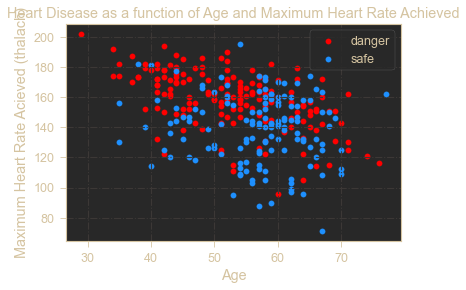

In [9]:
pt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="red")
pt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="dodgerblue")
pt.title("Heart Disease as a function of Age and Maximum Heart Rate Achieved")
pt.xlabel("Age")
pt.ylabel("Maximum Heart Rate Acieved (thalach)")
pt.legend(["danger", "safe"]);

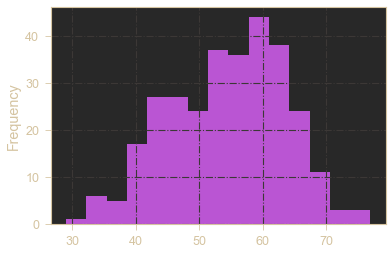

In [10]:
df.age.plot.hist(bins=15, color="mediumorchid");

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


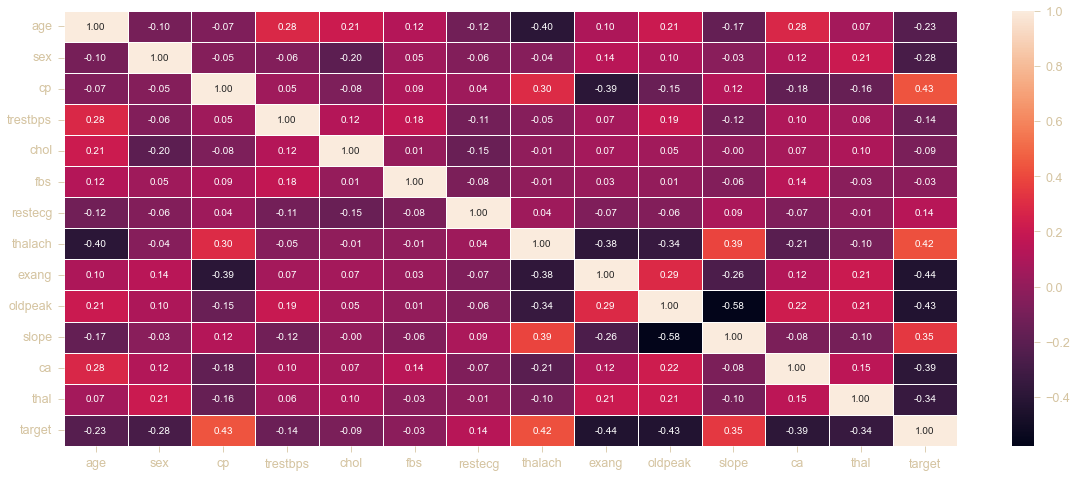

In [12]:
corr_matrix = df.corr()
fig, ax = pt.subplots(figsize=(20,8))
ax = sb.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='0.2f')

Variable Model Scoring Chart -
------------------------------
Logistic Regression : 88.524590%
KNC : 70.491803%
Random Forest Classifier : 90.163934%


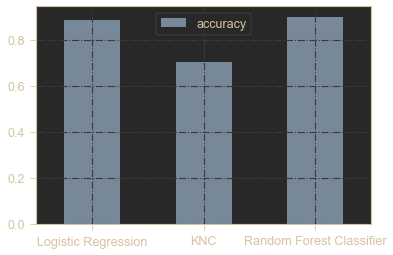

In [13]:
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models  : a dict of models to be fitted.
    X_train : training data (no labels).
    X_test  : testing data (no labels)..
    Y_train : training labels.
    Y_test  : testing labels.
    """
    np.random.seed(2)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores
X = df.drop("target", axis=1)
Y = df["target"]
np.random.seed(2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# Put the models in a dictioary..
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNC": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
print("Variable Model Scoring Chart -")
print("------------------------------")
for model,score in model_scores.items():
    print(f"{model} : {score*100:.6f}%")
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar", color="lightslategrey")
pt.xticks(rotation=0);

when n_neighbors = 10  train score = 69.01% and test score = 72.13%
when n_neighbors = 11  train score = 71.07% and test score = 65.57%
when n_neighbors = 12  train score = 69.83% and test score = 65.57%
when n_neighbors = 13  train score = 70.66% and test score = 65.57%
when n_neighbors = 14  train score = 70.25% and test score = 68.85%
when n_neighbors = 15  train score = 68.60% and test score = 70.49%
when n_neighbors = 16  train score = 67.36% and test score = 68.85%
when n_neighbors = 17  train score = 69.01% and test score = 72.13%
when n_neighbors = 18  train score = 67.36% and test score = 75.41%
when n_neighbors = 19  train score = 68.18% and test score = 75.41%
when n_neighbors = 20  train score = 67.36% and test score = 77.05%
when n_neighbors = 21  train score = 69.42% and test score = 75.41%
when n_neighbors = 22  train score = 68.18% and test score = 77.05%
when n_neighbors = 23  train score = 68.18% and test score = 73.77%
when n_neighbors = 24  train score = 66.94% and 

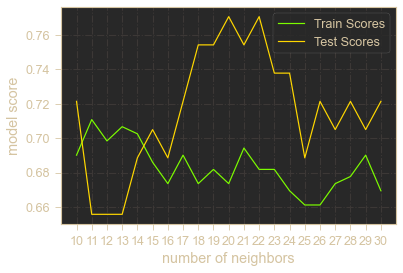

In [14]:
train_scores = []
test_scores = []
neighbors = range(10, 31)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))
    print(f"when n_neighbors = {i}  train score = {train_scores[i-10]*100:.2f}% and test score = {test_scores[i-10]*100:.2f}%")
pt.plot(neighbors, train_scores, label="Train Scores", color="lawngreen")
pt.plot(neighbors, test_scores, label="Test Scores", color="gold")
pt.xticks(np.arange(10,31,1))
pt.xlabel("number of neighbors")
pt.ylabel("model score")
pt.legend()
print(f"\nMaximum KNN score on the test data is: {max(test_scores)*100:.2f}%")

Results of RandomizedSearchCV:
------------------------------
The best parameters of LogisticRegression() is -
solver : liblinear
C : 0.23357214690901212
*-*-*
The best parameters of RandomForestClassifier() is -
n_estimators : 200
min_samples_split : 2
min_samples_leaf : 5
max_depth : None
*-*-*
The maximum score of LogisticRegression() is: 91.803%
The maximum score of RandomForestClassifier() is: 88.525%


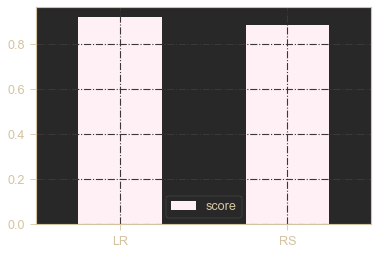

In [15]:
def print_best_params_(dic):
    """
    Accepts a dictiory of scores (typically those spit out by RandomizedSearchCV or GridSearchCV), and prints it.
    Since, this function is generally clubbed with a print function, the return None has been changed to *-*-* for aesthetics.
    """
    for parameter,value in dic.items():
        print(f"{parameter} : {value}")
    return "*-*-*"
np.random.seed(6)
lr_grid = {"C": np.logspace(-4,4,20), "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(100,1000,50), "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2), "min_samples_leaf": np.arange(1,20,2)}
# Tune and Fit..
lr_rscv = RandomizedSearchCV(LogisticRegression(), param_distributions=lr_grid, cv=5, n_iter=6) # set verbose=True to see details of the process
rf_rscv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=6) # set verbose=True to see details of the process
lr_rscv.fit(X_train, Y_train)
rf_rscv.fit(X_train, Y_train)
print("Results of RandomizedSearchCV:")
print("------------------------------")
print(f"The best parameters of LogisticRegression() is -")
print(f"{print_best_params_(lr_rscv.best_params_)}")
print(f"The best parameters of RandomForestClassifier() is -")
print(f"{print_best_params_(rf_rscv.best_params_)}")
print(f"The maximum score of LogisticRegression() is: {lr_rscv.score(X_test, Y_test)*100:.3f}%")
print(f"The maximum score of RandomForestClassifier() is: {rf_rscv.score(X_test, Y_test)*100:.3f}%")
pd.DataFrame(data={"LR": lr_rscv.score(X_test, Y_test), "RS": rf_rscv.score(X_test, Y_test)}, index=["score"]).T.plot(kind="bar", color="lavenderblush")
pt.xticks(rotation=0);

In [16]:
rf_grid2 = {"n_estimators": np.arange(10,1000,100),
            "max_features": ["auto", "sqrt"],
            "min_samples_leaf": [2, 4, 6, 8],
            "min_samples_split": [2, 4, 6, 8]}
rf_rscv2 = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid2, cv=2, n_iter=50)
rf_rscv2.fit(X_train, Y_train)
print_best_params_(rf_rscv2.best_params_)
print(f"Score: {rf_rscv2.score(X_test, Y_test)*100:.6f}%")

n_estimators : 610
min_samples_split : 6
min_samples_leaf : 6
max_features : sqrt
Score: 88.524590%


In [17]:
RandomForestClassifier(n_estimators=170, max_features="sqrt").fit(X_train, Y_train).score(X_test, Y_test)

0.9016393442622951

C:\DataPlay\Test_Proj\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


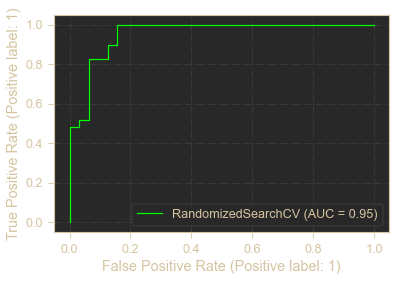

In [18]:
Y_preds = lr_rscv.predict(X_test)
plot_roc_curve(lr_rscv, X_test, Y_test, color="lime");

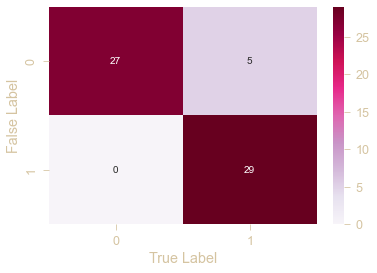

In [19]:
def plot_conf_mat(Y_test, Y_preds):
    """
    Accepts Y_test and Y_preds as paramters and plots a Confusion Matrix using seaborn's heatmap.
    """
    fig, ax = pt.subplots(figsize=(6,4))
    ax = sb.heatmap(confusion_matrix(Y_test, Y_preds), annot=True, cmap="PuRd")
    pt.xlabel("True Label")
    pt.ylabel("False Label");
plot_conf_mat(Y_test, Y_preds)

In [20]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



In [21]:
def cv_score(clf, X, Y, n):
    """
    Accepts -
    classifier: the model to use.
    X: the data without labels.
    Y: the labels.
    n: number of cross validations to perform.
    
    Prints out (both textually and visually) the cross validation score for accuracy, precision, recall and f1 score. 
    """
    cv_acc = cross_val_score(clf, X, Y, cv=n, scoring="accuracy")
    cv_prec = cross_val_score(clf, X, Y, cv=n, scoring="precision")
    cv_rec = cross_val_score(clf, X, Y, cv=n, scoring="recall")
    cv_f1 = cross_val_score(clf, X, Y, cv=n, scoring="f1")
    cv_acc_mean = np.mean(cv_acc)
    cv_prec_mean = np.mean(cv_prec)
    cv_rec_mean = np.mean(cv_rec)
    cv_f1_mean = np.mean(cv_f1)
    print(f"Cross Validation Score Chart ( cv = {n} )")
    print("---------------------------------------")
    print(f"Accuracy:  {cv_acc} -> {(cv_acc_mean)*100:.2f}%")
    print(f"Precision: {cv_prec} -> {(cv_prec_mean)*100:.2f}%")
    print(f"Recall:    {cv_rec} -> {(cv_rec_mean)*100:.2f}%")
    print(f"F1 score:  {cv_f1} -> {(cv_f1_mean)*100:.2f}%")
    pd.DataFrame({"Accuracy": cv_acc_mean, "Precision": cv_prec_mean,
                  "Recall": cv_rec_mean, "F1 Score": cv_f1_mean}, index=[0]).T.plot.bar(color="lavender", legend=False, zorder=0, figsize=(6,4))
    pt.xticks(rotation=0)

Cross Validation Score Chart ( cv = 6 )
---------------------------------------
Accuracy:  [0.82352941 0.82352941 0.94117647 0.82       0.86       0.7       ] -> 82.80%
Precision: [0.80645161 0.82758621 0.875      0.88461538 0.76470588 0.7       ] -> 80.97%
Recall:    [0.89285714 0.85714286 1.         0.74074074 0.96296296 0.77777778] -> 87.19%
F1 score:  [0.84745763 0.84210526 0.93333333 0.81632653 0.85245902 0.77966102] -> 84.52%


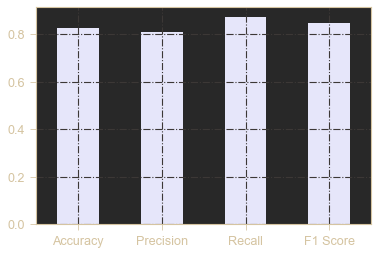

In [23]:
cv_score(lr_rscv, X, Y, 6)

In [22]:
lr_rscv.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [24]:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")
clf.fit(X_train, Y_train)
clf.coef_

array([[ 0.00934492, -0.97785902,  0.70381044, -0.01330693, -0.00310601,
        -0.04704677,  0.34835397,  0.02484743, -0.50829555, -0.40765939,
         0.45053226, -0.58411259, -0.5873724 ]])

In [25]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.009344919281307347,
 'sex': -0.9778590217824775,
 'cp': 0.7038104426462374,
 'trestbps': -0.013306927257456441,
 'chol': -0.0031060057327258104,
 'fbs': -0.04704676989118391,
 'restecg': 0.348353965711354,
 'thalach': 0.02484743050560621,
 'exang': -0.5082955453033698,
 'oldpeak': -0.4076593930714982,
 'slope': 0.4505322605983063,
 'ca': -0.5841125857527525,
 'thal': -0.5873724035665973}

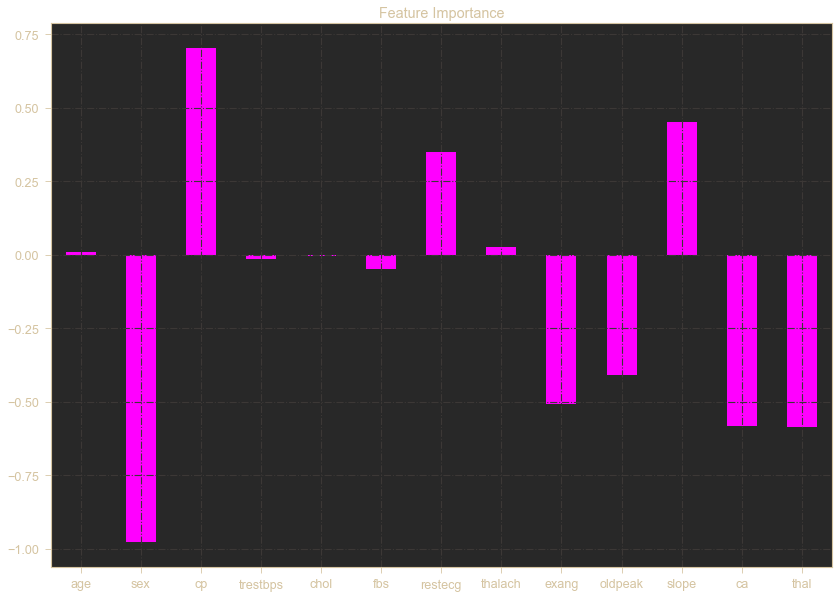

In [26]:
pd.DataFrame(feature_dict, index=[0]).T.plot.bar(legend=False, color="fuchsia", figsize=(14,10),
                                                 title="Feature Importance")
pt.xticks(rotation=0);